# k-Means Clustering trong Python

- Nguyễn Hữu Vũ  
- Nhóm nghiên cứu về AI đại học Bách Khoa Tp. Hồ Chí Minh

Thư viện sử dụng:  ``sklearn.cluster.KMeans``



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

##### Create random data

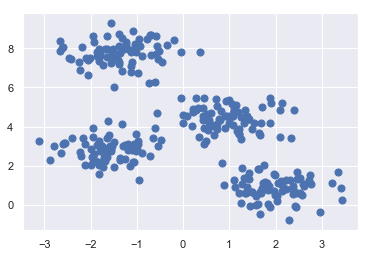

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Bằng mắt thường có thể thấy dữ liệu phía trên có thể được phân thành 4 nhóm (clusters)

##### Sử dụng KMeans

In [3]:
from sklearn.cluster import KMeans
#số cluster là 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [4]:
#centroids của các clusters
centers = kmeans.cluster_centers_
centers

array([[ 1.98258281,  0.86771314],
       [-1.37324398,  7.75368871],
       [-1.58438467,  2.83081263],
       [ 0.94973532,  4.41906906]])

In [5]:
centers.shape # Tổng cộng có 4 centroids tương ứng 4 clusters

(4, 2)

In [6]:
#predict nhóm của các data point
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 1, 3, 1, 0, 0, 2, 3, 1, 1, 2, 1, 3, 1, 0, 3, 3, 0, 2, 2, 0, 0,
       3, 2, 2, 3, 0, 3, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 0, 3, 2, 3, 3,
       2, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 1, 3, 1, 2, 2, 2,
       1, 0, 1, 2, 3, 2, 1, 2, 2, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 0, 3,
       1, 1, 3, 0, 1, 2, 2, 3, 0, 0, 3, 2, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3,
       2, 2, 0, 1, 0, 3, 1, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2,
       2, 0, 1, 2, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 1, 3, 1, 1, 1, 3, 1, 3,
       0, 2, 1, 2, 0, 3, 1, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 0, 3, 2, 1,
       0, 0, 3, 2, 0, 3, 2, 2, 3, 3, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 2, 3,
       2, 1, 3, 2, 0, 2, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 0, 0, 2, 0, 2, 3, 1, 1, 3, 3, 1, 3, 0, 2, 3, 0, 2, 1, 2, 0, 3,
       0, 1, 1, 1, 1, 2, 2, 1, 3, 2, 0, 3, 2, 2, 2, 0, 0, 1, 3, 3, 2, 0,
       1, 2, 3, 1, 3, 0, 0, 2, 2, 3, 0, 0, 0, 3, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 2, 1, 3, 0, 0, 1, 1, 1, 0, 0, 3, 1, 2])

Vì n_clusters=4 nên giá trị của y_kmeans từ 0 đến 3

##### Visualize dữ liệu

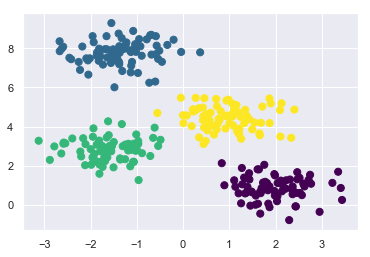

In [7]:
fig, ax = plt.subplots(1)

#Vẽ các điểm dữ liệu, clusters tương ứng của data point theo màu sắc
ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')



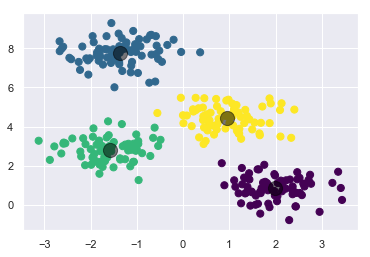

In [8]:
centers = kmeans.cluster_centers_
#Vẽ centroid của các clusterss
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
fig

#### The number of clusters must be selected beforehand
Một điểm yếu của k-means là chúng ta phải xác định `n_clusters`. Ví dụ nếu chúng ta chọn `n_clusters = 6` thì kết quả như sau:


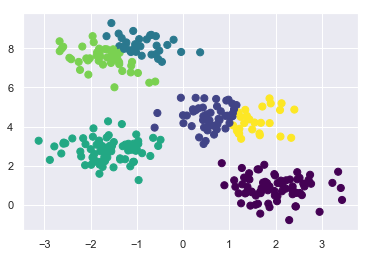

In [9]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Có thể thấy sự phân nhóm này không như chúng ta mong đợi

#### k-means is limited to linear cluster boundaries


In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

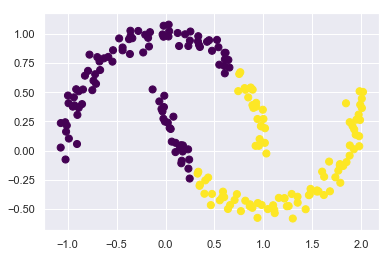

In [11]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

##### kernelized *k*-means 

One version of this kernelized *k*-means is implemented in Scikit-Learn within the ``SpectralClustering`` estimator.
It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a *k*-means algorithm:

C:\Users\Huu Vu\Downloads\Programs\WPy-3662\python-3.6.6.amd64\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


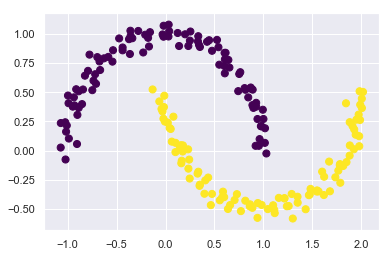

In [12]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');